# Import packages needed for this project

First we perform some imports of the packages we are going to use.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt
from PIL import Image

To begin we'll import the MNIST dataset from Keras. MNIST is a collection of 70,000 hand drawn images of digits 0 through 9 with 784 pixels (28x28) and an associated label of the corresponding digit. They are represented by feature vectors with 784 features each ranging in value from 0 to 255 corresponding to the darkness of the pixel.

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print(f'X_train shape: {x_train.shape}')
print(f'Y_train shape: {y_train.shape}')
print(f'X_test shape: {x_test.shape}')
print(f'Y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_test shape: (10000, 28, 28)
Y_test shape: (10000,)


In [ ]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(f'X_train shape: {x_train.shape}')
print(f'X_test shape: {x_test.shape}')

X_train shape: (60000, 784)
X_test shape: (10000, 784)


Now we'll scale the data by dividing each pixel values by 255 to ensure that they lie between 0 and 1.This it because ML algorithms typically perform beter when the data is appropriately scaled.

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

Let's try plotting some samples from our dataset.

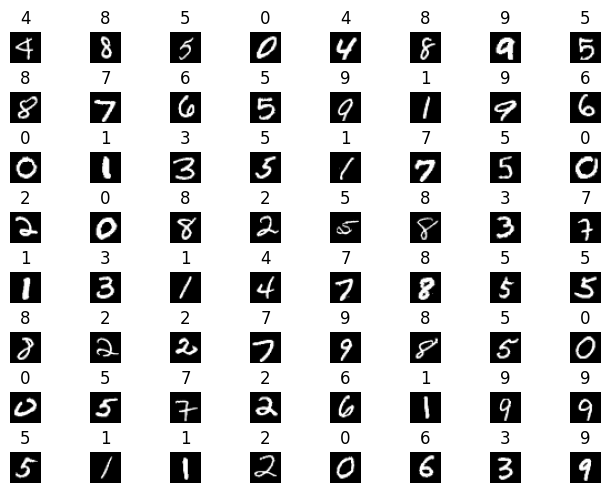

In [ ]:
m, n = x_train.shape

fig, axes = plt.subplots(8, 8)
fig.tight_layout(pad=0)
for i, ax in enumerate(axes.flat):
  random_index = np.random.randint(m)
  X_random_reshaped = x_train[random_index].reshape(28,28)
  ax.imshow(X_random_reshaped, cmap='gray')
  ax.set_title(y_train[random_index])
  ax.set_axis_off()

# Building Model

Below, using Keras Sequential model and Dense Layer with a ReLU activation to construct the three layer network.

In [ ]:
model = Sequential(
    [
        tf.keras.Input(shape=(784,)),
        Dense(256, activation='relu', name = 'L1'),
        Dense(256, activation='relu', name = 'L2'),
        Dense(10, activation='linear', name = 'L3')
    ], name = 'my_model'
)

In [ ]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 256)               200960    
                                                                 
 L2 (Dense)                  (None, 256)               65792     
                                                                 
 L3 (Dense)                  (None, 10)                2570      
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 269322 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The following code:
*   defines a loss function, SparseCategoricalCrossentropy and indicates the softmax should be included with the loss calculation by adding from_logits=True
*   defines an optimizer. A popular choice is Adaptive Moment (Adam) which was described in lecture.



In [ ]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    epochs=40
)

Epoch 1/40
1875/1875 [==============================] - 23s 11ms/step - loss: 0.1979 - accuracy: 0.9391
Epoch 2/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0826 - accuracy: 0.9745
Epoch 3/40
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0572 - accuracy: 0.9815
Epoch 4/40
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0437 - accuracy: 0.9860
Epoch 5/40
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0360 - accuracy: 0.9886
Epoch 6/40
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0289 - accuracy: 0.9903
Epoch 7/40
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0236 - accuracy: 0.9924
Epoch 8/40
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0196 - accuracy: 0.9936
Epoch 9/40
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0196 - accuracy: 0.9938
Epoch 10/40
1875/1875 [==============================] - 13s 7ms/step - 

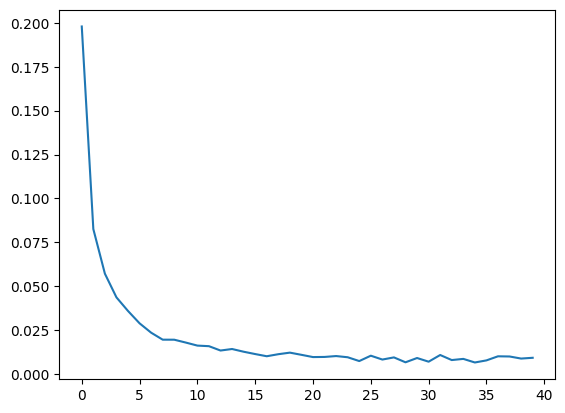

In [ ]:
plt.plot(history.history['loss'])

# Output Handling

To make a prediction, we can use Keras `predict`. The output of our model are not probabilities, but can range from large negative numbers to large positive numbers. The output must be sent through a softmax function when performing a prediction that expects a probability.

1/1 [==============================] - 0s 96ms/step
predicting a Zero: 
[[ 25.578188  -50.852623  -11.783184  -51.64377   -12.674702  -40.4576
   -6.75973   -25.849905  -33.1152     -2.0912628]]
Largest prediction index: 0


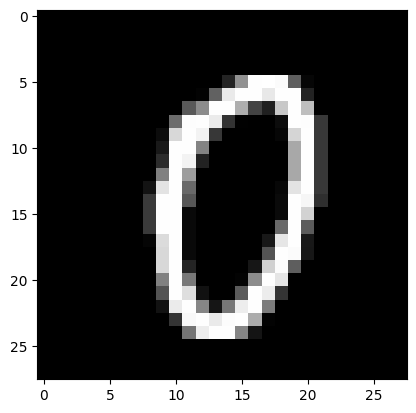

In [ ]:
image_of_zero = x_train[1000]
plt.imshow(x_train[1000].reshape(28,28), cmap='gray')

prediction = model.predict(image_of_zero.reshape(1, 784))

print(f'predicting a Zero: \n{prediction}')
print(f'Largest prediction index: {np.argmax(prediction)}')

If the problem requires a probability, a softmax is required:

In [ ]:
prediction_p = tf.nn.softmax(prediction)

for i in range(10):
  print(f'Probability of {i}: {prediction_p[0][i]:.8f}')
print(f'Total of predictions: {np.sum(prediction_p)}')

Probability of 0: 1.00000000
Probability of 1: 0.00000000
Probability of 2: 0.00000000
Probability of 3: 0.00000000
Probability of 4: 0.00000000
Probability of 5: 0.00000000
Probability of 6: 0.00000000
Probability of 7: 0.00000000
Probability of 8: 0.00000000
Probability of 9: 0.00000000
Total of predictions: 1.0


Let's compare the predictions vs the labels for a random sample of 64 digits from **x_train** (the sets we use to train our model).

1/1 [==============================] - 0s 22ms/step


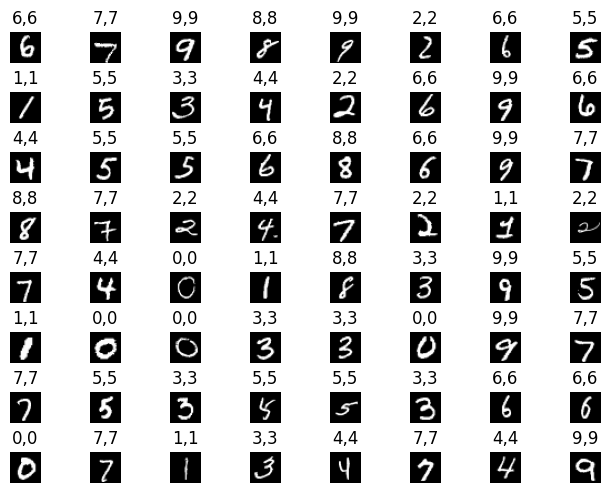

In [ ]:
m, n = x_train.shape

fig, axes = plt.subplots(8,8)
fig.tight_layout(pad=0)

for i, ax in enumerate(axes.flat):
  random_index = np.random.randint(m)
  X_random_reshaped = x_train[random_index].reshape(28,28)
  ax.imshow(X_random_reshaped, cmap='gray')
  prediction = model.predict(x_train[random_index].reshape(1, 784))
  yhat = np.argmax(prediction)
  ax.set_title(f'{y_train[random_index]},{yhat}')
  ax.set_axis_off()
plt.show()

Now let's look at some of the errors

In [ ]:
def display_errors(model, X, y):
  f = model.predict(X)
  yhat = np.argmax(f, axis=1)
  idxs = np.where(yhat != y)[0]
  if len(idxs) == 0:
    print('no errors found')
  elif len(idxs) == 1:
    j = idxs[0]
    plt.title(f'{y[j]}, {yhat[j]}')
    plt.imshow(X[j].reshape(28,28), cmap='gray')
  else:
    cnt = min(8, len(idxs))
    fig, axes = plt.subplots(1, cnt)
    fig.tight_layout(pad=0)

    for i, ax in enumerate(axes):
      j = idxs[i]
      ax.imshow(X[j].reshape(28,28), cmap='gray')
      ax.set_title(f'{y[j]}, {yhat[j]}')
      ax.set_axis_off()
    return len(idxs)

1875/1875 [==============================] - 5s 3ms/step
51 errors out of 60000 images


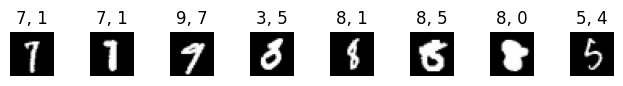

In [ ]:
print( f"{display_errors(model,x_train,y_train)} errors out of {len(x_train)} images")

Now let's test our model using **x_test** dataset we prepared in the beginning.

313/313 [==============================] - 1s 2ms/step
161 errors out of 10000 images


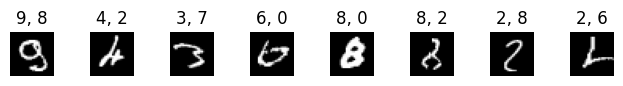

In [ ]:
print( f"{display_errors(model,x_test,y_test)} errors out of {len(x_test)} images")

Now we will show the accuracy metrics provided by Tensorflow on x_train and x_test.

In [ ]:
train_acc = model.evaluate(x_train, y_train)[1]
test_acc = model.evaluate(x_test, y_test)[1]

print(f'x_train accuracy: {train_acc * 100.0:.2f}%')
print(f'x_test accuracy: {test_acc * 100.0:.2f}%')

313/313 [==============================] - 1s 3ms/step - loss: 0.1410 - accuracy: 0.9839
x_train accuracy: 99.91%
x_test accuracy: 98.39%


# Test

In [ ]:
def predict_image(model, imgName):
  img = Image.open(imgName).convert('L')
  img = np.array(img)
  img = img / 255
  predict = model.predict(img.reshape(1, 784))
  yhat = np.argmax(predict)
  plt.title(f'Prediction: {yhat}')
  plt.imshow(img.reshape(28, 28), cmap='gray')

1/1 [==============================] - 0s 20ms/step


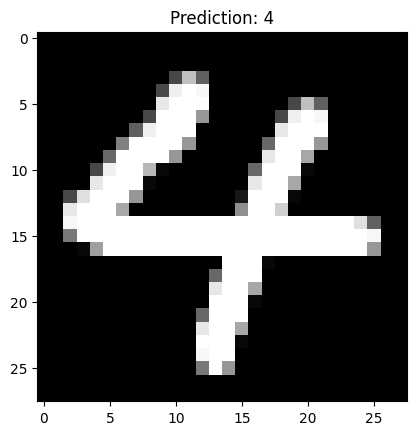

In [ ]:
predict_image(model, 'Untitled.png')